# TIPE 2023-2024 "Jeux et sports" 
### MORAIN Arthur MP2 Montaigne

## <ins>Optimisation de l'arrêt au stand en Formule 1</ins> 

### **<ins>VII- Modèle de dégradation des pneumatiques :</ins>**   

#### **<ins>a- Modèle de dégradation des pneumatiques :</ins>**   

In [13]:
import pandas as pd
import requests
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import re
import time

In [20]:
def usure_pneumatiques(circuit : str, pneus : str) -> (dict,dict) :
    '''Permet d'obtenir les temps au tour en moyenne pour le type de pneus et le circuit demandé, 
    celui-ci est fait par une moyenne arithmétique puis géométrique et le renvoie sous forme de dictionnaire'''
    #ouverture des datasets
    df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')
    df2 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/circuit_length.csv')
    
    #construction des données nécessaires
    def series_to_dict(df, key : str, value : str) -> dict :
        ''' Permet de prendre deux series du module pandas pour construire un dictionnaire avec les 
        clés de la colonne souhaité et le valeurs de la colonne souhaité'''
        L1 = df[key].tolist()
        L2 = df[value].tolist()
        D={}
        assert len(L1)==len(L2)
        for i in range(len(L1)) :
            D[L1[i]] = L2[i] 
        return(D)
    
    circuit_info = series_to_dict(df2,'EventName','designedLaps')
    
    def str_to_time(mot : str) -> float :
        '''L'objectif est de transformer les temps qui sont en string en un flottant sur lequel on pourra faire des 
        additions, pour optimiser la complexité temporelle, on construit le programme sur l'écriture particulière de ces 
        temps, qui sont similaires, sauf cas particulier du 'nan' '''
        t = 0
        if mot=='nan' :
            t = 0
        else :
            a = float(mot[11]) * 60
            t = a + float(mot[13:])
        return(t)
    
    #construction de la fonction souhaitée
    def modele_pneus(df, circuit_id : dict , circuit : str , pneus : str ) -> dict :
        '''la fonction décrite au début, le premier renvoie la moyenne arithmétique l'autre géométrique'''
        
        #programmation défensive
        D = {'SOFT':1,'MEDIUM':2,'HARD':3}
        assert circuit in circuit_id.keys()
        assert pneus in D.keys()
        
        #mise en place des demandes des variables
        df = df[df['EventName']==circuit]
        df = df[df['session']=='Race']
        df = df[df['Compound']==pneus] 
        nbr_laps = circuit_id[circuit]
        n = nbr_laps
        #on met en place une liste de nbr_laps listes avec les temps pour le i-ème tour
        L = []
        for i in range(n) :
            df2 = df[df['LapNumber']==float(i+1)]
            L.append(df2['LapTime'].tolist())
        #print(L)
        #on sait que s'il y a une liste vide à un moment il y a un changement de relais 
        #on peut aller associer la prochaine liste non nulle à la première liste et ainsi de suite
        k=0
        #print(len(L))
        while len(L[k])>0 and k<(len(L)-1) :
            k+=1
        if k<len(L)-1 :
            for i in range(k) : 
                L[i] = L[i] + L[k+i]
            L= L[:k]
        
        #on passe maintenant aux calculs de moyenne qu'on stocke dans un dictionnaire
        D1={}
        D2={}
        n=len(L)
        #calcul de la moyenne sur un circuit
        S = 0 
        n2 = 0
        for i in range(n) :
            size = len(L[i])
            n2 += size
            lst=L[i]
            for l in range(size) :
                S += str_to_time(str(lst[l]))
        moyenne=S/n2
        print(moyenne)
        #calcul des temps
        for i in range(n) :
            o = len(L[i])
            L2 = L[i]
            S = 0
            P = 1
            if o==0 : 
                D[i+1] = 0
            else :
                for l in range(o) :
                    t = str_to_time(str(L2[l]))
                    if l>2 :
                        if t<(moyenne+3) :
                            P = P * t
                            S += t
                        else :
                            o -= 1
                    elif l<=2 :
                        P = P*t
                        S += t
                D1[i+1] = S/o
                D2[i+1] = pow(P, (1.0)/o)
        return((D1,D2))
    
    ((D1,D2)) = modele_pneus(df1,circuit_info,circuit,pneus)
    #en faire un joli graphique
    fig = plt.figure(figsize=(12,2))
    plt.plot(D1.keys(),D1.values())
    plt.plot(D2.keys(),D2.values())
    plt.grid()
    plt.xlabel('Lap Number')
    plt.ylabel('Lap Time (Sec)')
    plt.title('Durée au temps moyenne pour des pneus '+pneus+' sur le circuit '+circuit)
    plt.legend(['Moyenne arithmétique','Moyenne géométrique'])
    
    
    return((D1,D2))

    
    
    
    
        
        
        
    
    
        
        
        

/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1839382198.py:5: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.8946701388888


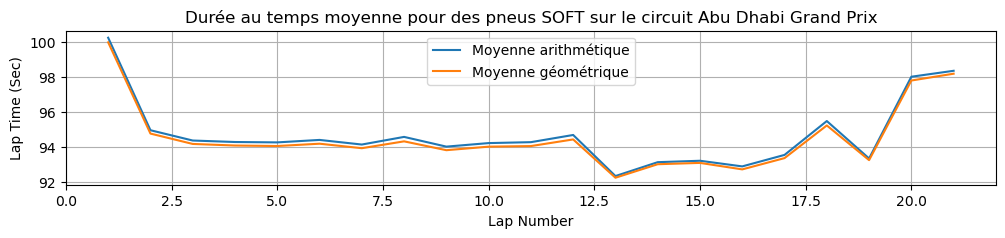

In [21]:
 a = usure_pneumatiques('Abu Dhabi Grand Prix', 'SOFT')

/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1839382198.py:5: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


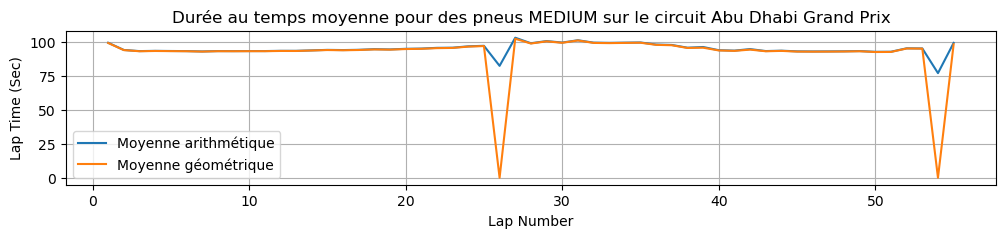

In [22]:
c = usure_pneumatiques('Abu Dhabi Grand Prix', 'MEDIUM')

### **<ins>b- complexité du modèle de dégradation des pneumatiques :</ins>**   

In [32]:
 def usure_pneumatiques_complexite(circuit : str, pneus : str) -> int :
    '''Permet d'obtenir les temps au tour en moyenne pour le type de pneus et le circuit demandé, 
    celui-ci est fait par une moyenne arithmétique puis géométrique et le renvoie sous forme de dictionnaire'''
    S2 = 0
    #ouverture des datasets
    df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')
    df2 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/circuit_length.csv')
    
    #construction des données nécessaires
    def series_to_dict(df, key : str, value : str) -> dict :
        ''' Permet de prendre deux series du module pandas pour construire un dictionnaire avec les 
        clés de la colonne souhaité et le valeurs de la colonne souhaité'''
        L1 = df[key].tolist()
        L2 = df[value].tolist()
        D={}
        assert len(L1)==len(L2)
        for i in range(len(L1)) :
            D[L1[i]] = L2[i] 
        return(D)
    
    circuit_info = series_to_dict(df2,'EventName','designedLaps')
    
    def str_to_time(mot : str) -> float :
        '''L'objectif est de transformer les temps qui sont en string en un flottant sur lequel on pourra faire des 
        additions, pour optimiser la complexité temporelle, on construit le programme sur l'écriture particulière de ces 
        temps, qui sont similaires, sauf cas particulier du 'nan' '''
        t = 0
        if mot=='nan' :
            t = 0
        else :
            a = float(mot[11]) * 60
            t = a + float(mot[13:])
        return(t)
    
    #construction de la fonction souhaitée
    def modele_pneus(df, circuit_id : dict , circuit : str , pneus : str , S2 : int) -> dict :
        '''la fonction décrite au début, le premier renvoie la moyenne arithmétique l'autre géométrique'''
        
        #programmation défensive
        D = {'SOFT':1,'MEDIUM':2,'HARD':3}
        assert circuit in circuit_id.keys()
        assert pneus in D.keys()
        
        #mise en place des demandes des variables
        df = df[df['EventName']==circuit]
        df = df[df['session']=='Race']
        df = df[df['Compound']==pneus] 
        nbr_laps = circuit_id[circuit]
        n = nbr_laps
        #on met en place une liste de nbr_laps listes avec les temps pour le i-ème tour
        L = []
        for i in range(n) :
            df2 = df[df['LapNumber']==float(i+1)]
            L.append(df2['LapTime'].tolist())
        #print(L)
        #on sait que s'il y a une liste vide à un moment il y a un changement de relais 
        #on peut aller associer la prochaine liste non nulle à la première liste et ainsi de suite
        k=0
        #print(len(L))
        while len(L[k])>0 and k<(len(L)-1) :
            S2 += len(L[k])
            k+=1
        if k<len(L)-1 :
            for i in range(k) : 
                L[i] = L[i] + L[k+i]
            L= L[:k]
        
        #on passe maintenant aux calculs de moyenne qu'on stocke dans un dictionnaire
        D1={}
        D2={}
        n=len(L)
        #calcul de la moyenne sur un circuit
        S = 0 
        n2 = 0
        for i in range(n) :
            size = len(L[i])
            n2 += size
            lst=L[i]
            for l in range(size) :
                S += str_to_time(str(lst[l]))
        if n2>0 :
            
            moyenne=S/n2
            print(moyenne)
        #calcul des temps
        for i in range(n) :
            o = len(L[i])
            L2 = L[i]
            S = 0
            P = 1
            if o==0 : 
                D[i+1] = 0
            else :
                for l in range(o) :
                    t = str_to_time(str(L2[l]))
                    if l>2 :
                        if t<(moyenne+3) :
                            P = P * t
                            S += t
                        else :
                            o -= 1
                    elif l<=2 :
                        P = P*t
                        S += t
                if o > 0 :
                    
                    D1[i+1] = S/o
                    D2[i+1] = pow(P, (1.0)/o)
        return(S2)
    
    S2 = modele_pneus(df1,circuit_info,circuit,pneus,S2)
    return(S2)

In [33]:
def lst_temps(l1 : list, l2 : list) -> dict :
    Temps = {}
    n1 = len(l1)
    n2 = len(l2)
    for i in range(n1) :
        t1 = time.time()
        S=0
        for l in range(i) :
            S += usure_pneumatiques_complexite(l1[l],l2[0])
        t2 = time.time()
        delta = t2 - t1 
        Temps[S] = delta
        
        #graphique pour voir l'évolution
    fig = plt.figure(figsize=(12,2))
    plt.plot(Temps.keys(),Temps.values())
    plt.grid()
    plt.xlabel('Nombre données de tour')
    plt.ylabel("Durée d'exécution")
    plt.title('Approximation de la complexité')
    return(Temps)
            
    
    

In [34]:
l1 = ['Abu Dhabi Grand Prix','Australian Grand Prix','Austrian Grand Prix','Azerbaijan Grand Prix','Bahrain Grand Prix',
      'Belgian Grand Prix','Brazilian Grand Prix','British Grand Prix','Canadian Grand Prix','Chinese Grand Prix',
      'Dutch Grand Prix','French Grand Prix','Hungarian Grand Prix','Italian Grand Prix','Japanese Grand Prix',
      'Mexican Grand Prix','Monaco Grand Prix','Russian Grand Prix','Saudi Arabia Grand Prix','Singapore Grand Prix',
      'Spanish Grand Prix','United States Grand Prix','Emilia Romagna Grand Prix','German Grand Prix','Portuguese Grand Prix',
      'Qatar Grand Prix']

/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


78.14083285024152


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


78.14083285024152


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.18632838427956


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


78.14083285024152


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.18632838427956


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


85.12230352084173


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


78.14083285024152


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.18632838427956


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


85.12230352084173


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


87.39901781737174


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


78.14083285024152


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.18632838427956


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


85.12230352084173


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


87.39901781737174


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.02195381062353


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


78.14083285024152


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.18632838427956


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


85.12230352084173


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


87.39901781737174


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.02195381062353


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


84.1680666666667


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


78.14083285024152


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.18632838427956


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


85.12230352084173


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


87.39901781737174


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.02195381062353


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


84.1680666666667


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


80.41334462809915


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


78.14083285024152


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.18632838427956


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


85.12230352084173


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


87.39901781737174


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.02195381062353


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


84.1680666666667


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


80.41334462809915


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.45287626031165


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


78.14083285024152


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.18632838427956


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


85.12230352084173


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


87.39901781737174


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.02195381062353


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


84.1680666666667


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


80.41334462809915


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.45287626031165


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')
/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


78.14083285024152


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.18632838427956


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


85.12230352084173


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


87.39901781737174


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.02195381062353


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


84.1680666666667


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


80.41334462809915


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.45287626031165


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')
/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.54511171171171


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


78.14083285024152


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.18632838427956


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


85.12230352084173


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


87.39901781737174


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.02195381062353


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


84.1680666666667


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


80.41334462809915


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.45287626031165


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')
/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.54511171171171


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


86.18173764387282


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


78.14083285024152


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.18632838427956


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


85.12230352084173


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


87.39901781737174


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.02195381062353


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


84.1680666666667


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


80.41334462809915


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.45287626031165


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')
/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.54511171171171


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


86.18173764387282


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


102.4157019681348


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


78.14083285024152


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.18632838427956


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


85.12230352084173


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


87.39901781737174


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.02195381062353


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


84.1680666666667


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


80.41334462809915


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.45287626031165


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')
/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.54511171171171


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


86.18173764387282


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


102.4157019681348


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


82.29841417910454


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


78.14083285024152


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.18632838427956


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


85.12230352084173


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


87.39901781737174


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.02195381062353


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


84.1680666666667


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


80.41334462809915


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.45287626031165


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')
/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.54511171171171


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


86.18173764387282


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


102.4157019681348


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


82.29841417910454


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')
/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.55810615384614


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


91.05849039692691


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


73.04040280210168


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


109.02829732408335


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.72058275058279


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


106.69152064026949


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


75.73884492481203


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


93.48667871485945


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


81.63676911544222


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.71412540716615


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


78.14083285024152


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.18632838427956


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


85.12230352084173


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


87.39901781737174


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


97.02195381062353


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


84.1680666666667


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


80.41334462809915


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


98.45287626031165


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')
/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


100.54511171171171


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


86.18173764387282


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


102.4157019681348


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


82.29841417910454


/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')
/var/folders/vk/f22z063n5rl20ps172zv7gxm0000gn/T/ipykernel_13064/1535690992.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/CSV/lapweatherf1.csv')


85.76441930618402


{0: 9.5367431640625e-07,
 1287: 2.186600923538208,
 2063: 3.9555342197418213,
 3772: 5.9214699268341064,
 4772: 7.897726058959961,
 6907: 9.798135042190552,
 8076: 11.827510595321655,
 9134: 13.738490104675293,
 10866: 15.67737889289856,
 11526: 17.643830060958862,
 12124: 19.601498126983643,
 13157: 21.58196520805359,
 14297: 167.10443997383118,
 16762: 25.53424906730652,
 18538: 27.49581003189087,
 19396: 29.429306030273438,
 19920: 31.395215034484863,
 21124: 1159.3263847827911,
 22206: 37.28484296798706,
 22757: 39.15558481216431,
 25694: 41.23978304862976,
 26753: 43.15518379211426,
 28345: 47.24258494377136,
 29667: 49.09381103515625}

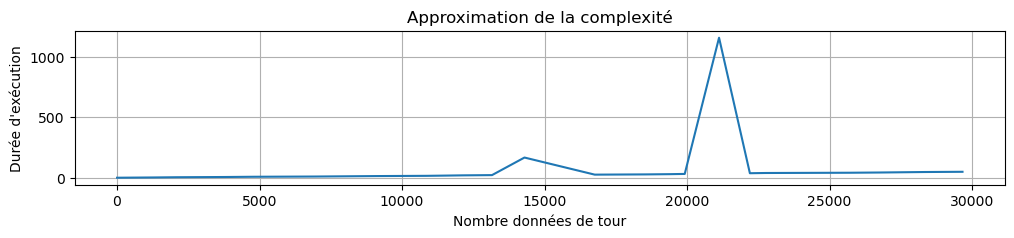

In [35]:
lst_temps(l1,['MEDIUM'])